<b>Arnie Larson<br/>
2/28/20123<br/>
Acoustics Homework Notes<br/>
</b>


#### HW 5

- 3 problems, focusing on issues with transmission and reflection and applications of boundary conditions.


### Problem 1

**Summary** 

**Case 1**

- Z1 < Z2
- Rays refract upwards, (critical incidence around $\theta_i = 33^{\circ}$ )
- At normal indcidence most (82%) of the energy is transmitted

**Case 2**

- Z1 > Z2
- Rays refract downwards, (no critical angle, but there is a phase difference for the pressure around $\theta_i \lt 12^{\circ}$ 
- At normal indcidence almost all (98%) of the energy is transmitted

**Case 2**

- Z1 << Z2 (Air to water)
- Rays refract upwards, (critical angle incidence around $\theta_i = 77^{\circ}$ )
- At normal indcidence almost all of the energy is reflected, (0.1% transmitted)

Reflections from a single interface, as a function of the grazing angle, (as opposed to the angle from normal as often done in optics).

Using the equations for reflection and transmission from a single boundary, with continuity of pressure and velocity incorporated as boundary conditions.

$R = \frac{Z_2 sin \theta_1 - Z_1 sin \theta_2}{Z_2 sin \theta_1 + Z_2 sin \theta_2}$, 
$T = \frac{2 Z_2 sin \theta_1  } {( Z_2 sin \theta_1 + Z_2 sin \theta_2 )}$

As well as snells law derived earlier $\frac{cos \theta_2}{c_2} = \frac{cos \theta_1}{c_1}$

For the 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
theta = np.linspace(0.001,90,180)*np.pi/180

In [4]:
# case 1
c1=1500; c2=1800          # speeds in [m/s]
rho1=1030; rho2=2100      # density in [kg/m^3]
Z1=c1*rho1; Z2=c2*rho2    # acoustic impedence
print("Case1: Medium 1 has Z1 {}, 2 has Z2 {}".format(Z1,Z2))
theta_2 = np.nan_to_num(np.arccos(c2*np.cos(theta)/c1))
R = (Z2 * np.sin(theta) - Z1 * np.sin(theta_2))/ (Z2*np.sin(theta) + Z1*np.sin(theta_2))
T = 2*Z2*np.sin(theta)/(Z2*np.sin(theta) + Z1*np.sin(theta_2))
pr = R*0.1; pt = T*0.1    # Pressure in [Pa]
# Power, at normal incidence (theta = theta_2 = 90 degrees)
Rp = ((Z2 - Z1)/(Z2+Z1))**2
Tp = 4 * Z1 * Z2 / (Z1 + Z2 )**2
print("At normal incidence, Rp = {:.3f}, Tp = {:.3f}".format(Rp,Tp))

Case1: Medium 1 has Z1 1545000, 2 has Z2 3780000
At normal incidence, Rp = 0.176, Tp = 0.824


<ipython-input-4-8ba415d80bba>:6: RuntimeWarning: invalid value encountered in arccos
  theta_2 = np.nan_to_num(np.arccos(c2*np.cos(theta)/c1))


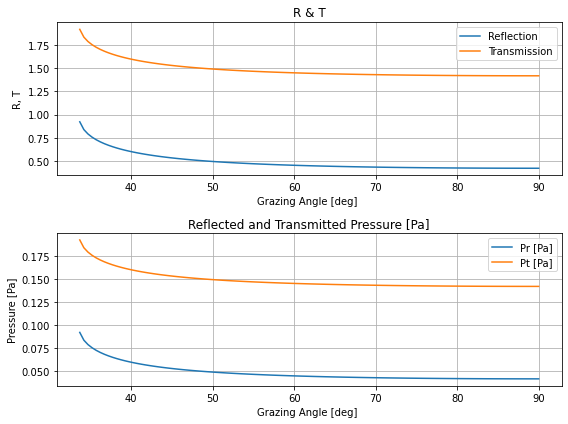

In [5]:
# Note - per instructions, I'm removing the part where R = 1, or theta < theta_c. 

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6));
ax1.plot(theta[theta_2>0]*180/np.pi, R[theta_2>0], label="Reflection")
ax1.plot(theta[theta_2>0]*180/np.pi, T[theta_2>0], label="Transmission")
ax1.grid('true'); ax1.legend()
ax1.set_xlabel("Grazing Angle [deg] "), ax1.set_ylabel("R, T")
ax1.set_title("R & T")
ax2.plot(theta[theta_2>0]*180/np.pi, pr[theta_2>0], label="Pr [Pa]")
ax2.plot(theta[theta_2>0]*180/np.pi, pt[theta_2>0], label="Pt [Pa]")
ax2.grid('true'); ax2.legend()
ax2.set_xlabel("Grazing Angle [deg] "), ax2.set_ylabel("Pressure [Pa]")
ax2.set_title("Reflected and Transmitted Pressure [Pa]")
fig.tight_layout()
plt.show()

In [6]:
# case 2
c1=1490; c2=1460          # speeds in [m/s]
rho1=1025; rho2=1500      # density in [kg/m^3]
Z1=c1*rho1; Z2=c2*rho2
theta_2 = np.nan_to_num(np.arccos(c2*np.cos(theta)/c1))
R = (Z2 * np.sin(theta) - Z1 * np.sin(theta_2))/ (Z2*np.sin(theta) + Z1*np.sin(theta_2))
T = 2*Z2*np.sin(theta)/(Z2*np.sin(theta) + Z1*np.sin(theta_2))
pr = R*0.1; pt = T*0.1    # Pressure in [Pa]
# Power, at normal incidence (theta = 90 degrees)
Rp = ((Z2 - Z1)/(Z2+Z1))**2
Tp = 4 * Z1 * Z2 / (Z1 + Z2 )**2
print("At normal incidence, Rp = {:.3f}, Tp = {:.3f}".format(Rp,Tp))


At normal incidence, Rp = 0.032, Tp = 0.968


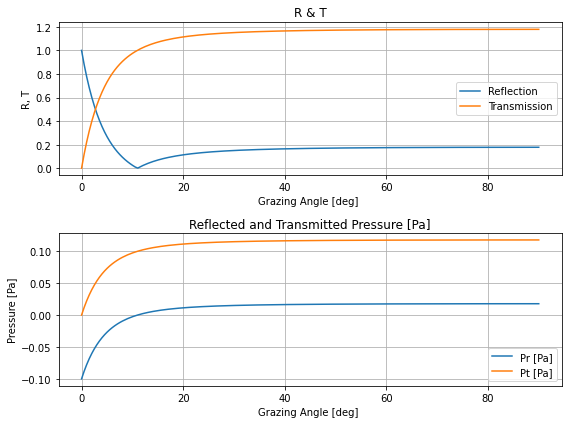

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6));
ax1.plot(theta*180/np.pi, np.abs(R), label="Reflection")
ax1.plot(theta*180/np.pi, T, label="Transmission")
ax1.grid('true'); ax1.legend()
ax1.set_xlabel("Grazing Angle [deg] "), ax1.set_ylabel("R, T")
ax1.set_title("R & T")
ax2.plot(theta*180/np.pi, pr, label="Pr [Pa]")
ax2.plot(theta*180/np.pi, pt, label="Pt [Pa]")
ax2.grid('true'); ax2.legend()
ax2.set_xlabel("Grazing Angle [deg] "), ax2.set_ylabel("Pressure [Pa]")
ax2.set_title("Reflected and Transmitted Pressure [Pa]")
fig.tight_layout()
plt.show()

In [8]:
# case 3 (air to water)
c1=330; c2=1490          # speeds in [m/s]
rho1=1; rho2=1000        # density in [kg/m^3]
Z1=c1*rho1; Z2=c2*rho2
theta_2 = np.nan_to_num(np.arccos(c2*np.cos(theta)/c1))
R = (Z2 * np.sin(theta) - Z1 * np.sin(theta_2))/ (Z2*np.sin(theta) + Z1*np.sin(theta_2))
T = 2*Z2*np.sin(theta)/(Z2*np.sin(theta) + Z1*np.sin(theta_2))
pr = R*0.1; pt = T*0.1    # Pressure in [Pa]
# Power, at normal incidence (theta = 90 degrees)
Rp = ((Z2 - Z1)/(Z2+Z1))**2
Tp = 4 * Z1 * Z2 / (Z1 + Z2 )**2
print("At normal incidence, Rp = {:.4f}, Tp = {:.4f}".format(Rp,Tp))

At normal incidence, Rp = 0.9991, Tp = 0.0009


<ipython-input-8-b3fadf8dbf4b>:5: RuntimeWarning: invalid value encountered in arccos
  theta_2 = np.nan_to_num(np.arccos(c2*np.cos(theta)/c1))


<ipython-input-9-eb753ba587fd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(['{:.5f}'.format(x) for x in yvals])
<ipython-input-9-eb753ba587fd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:.5f}'.format(x) for x in yvals])
<ipython-input-9-eb753ba587fd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['{:.5f}'.format(x) for x in yvals])


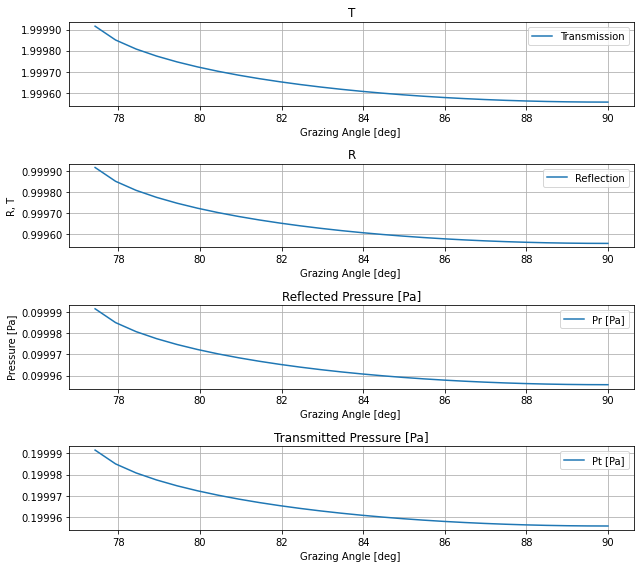

In [9]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1,figsize=(9,8));

ax0.plot(theta[theta_2>0]*180/np.pi, T[theta_2>0], label="Transmission")
ax0.grid('true'); ax0.legend()
ax0.set_xlabel("Grazing Angle [deg] "), ax1.set_ylabel("T")
ax0.set_title("T")
# after plotting the data, format the labels
yvals = ax0.get_yticks()
ax0.set_yticklabels(['{:.5f}'.format(x) for x in yvals])

ax1.plot(theta[theta_2>0]*180/np.pi, R[theta_2>0], label="Reflection")
ax1.grid('true'); ax1.legend()
#ax1.set_xlim(xmin=.90000, xmax=1.1)
ax1.set_xlabel("Grazing Angle [deg] "), ax1.set_ylabel("R, T")
ax1.set_title("R")

# after plotting the data, format the labels
yvals = ax1.get_yticks()
ax1.set_yticklabels(['{:.5f}'.format(x) for x in yvals])

ax2.plot(theta[theta_2>0]*180/np.pi, pr[theta_2>0], label="Pr [Pa]")
ax2.grid('true'); ax2.legend()
ax2.set_xlabel("Grazing Angle [deg] "), ax2.set_ylabel("Pressure [Pa]")
ax2.set_title("Reflected Pressure [Pa]")

ax3.plot(theta[theta_2>0]*180/np.pi, pt[theta_2>0], label="Pt [Pa]")
ax3.grid('true'); ax3.legend()
ax3.set_xlabel("Grazing Angle [deg] "), ax2.set_ylabel("Pressure [Pa]")
ax3.set_title("Transmitted Pressure [Pa]")
# after plotting the data, format the labels
yvals = ax3.get_yticks()
ax3.set_yticklabels(['{:.5f}'.format(x) for x in yvals])

fig.tight_layout()
plt.show()

### Problem 2

**Summary Notes**

- for $f=500 Hz$ the wavelength is around $\lambda \approx 3 m \; \; (\frac{c}{f})$
- $h=0.2 m  \rightarrow \lambda \gg h$    is similar to case 1 above, but with more reflection.
- $h=1m \rightarrow \lambda \gt h$  there is a more complicated pattern, like interference
- $h=5m \rightarrow \lambda \lt h$ there is a more complicated pattern
- Critical angles shouldn't have dependence on h, and just the mediums.  My analysis below is that Snell's law will hold between medium 2 and 1.
- Although upon thinking about it now, it's possible that my code doesn't take into account the complex solution corretly and may be lacking some details that a full solution should have.

3 Layer interface, with middle layer having thickness $h$, find R and T as a function of $\theta_i$

- $\rho_1 = 1030\; kg/m^3, c_1 = 1500\; m/s, z_1 = 1.545 \times 10^6\; [kg m^{-2} s^{-1}]$
- $\rho_2 = 2000\; kg/m^3, c_2 = 1650\; m/s, z_2 = 3.3 \times 10^6\; [kg m^{-2} s^{-1}]$
- $\rho_3 = 2100\; kg/m^3, c_3 = 1800\; m/s, z_3 = 3.78 \times 10^6\; [kg m^{-2} s^{-1}]$

For the geometry and basic math for the layers (see attached notes) we use the boundary condtions:

- Massless smooth interfaces, (continuous pressure)
- Continuous Normal velocity at the interfaces
- This leads to 4 equations at $x=0; y=0$ and $x=0; y=-h$
- The harmonic time component is common and drops out of equations \[e.g. phasor transform\].

Note that applications of Snell's law $\frac{cos \theta_1}{c_1} = \frac{cos \theta_2}{c_2} = \frac{cos \theta_3}{c_3}$ leads to: 
 
- $cos \theta_2 = \frac{c_2}{c_1} cos \theta_1$
- $cos \theta_3 = \frac{c_3}{c_1} cos \theta_1$

Noting that the spacial frequency or wave number is

$|\vec{k}| = \frac{2 \pi}{\lambda}\;$ and $ k_y = \frac{2 \pi}{\lambda} sin \theta$

The 4 equations I find are:

$1 + R = A + B$

$Ae^{j k_y^{(2)}h} + Be^{-j k_y^{(2)}h} = T e^{j k_y^{(3)}h}$

$\frac{sin \theta_1}{z_1} - R\frac{sin \theta_1}{z_1} =  A \frac{sin \theta_2}{z_2} - B \frac{sin \theta_2}{z_2}$

$\frac{A sin \theta_2}{z_2}e^{j k_y^{(2)} h} - \frac{B sin \theta_2}{z_2} e^{ -j k_y^{(2)} h} =  T \frac{sin \theta_3}{z_3}e^{j k_y^{(3)} h}$

In [2]:
z1 = 1030 * 1500;
z2 = 2000 * 1650;
z3 = 2100 * 1800;
print("z1 = {}; z2 = {}; z3 = {} [x10^6 kg / m^2 /s]".format(z1*1e-6,z2*1e-6,z3*1e-6))

# smallest angle that will work, theta3 => 0
print("Smallest grazing angle: {:.3f} [deg]".format(np.arccos(1500/1800)*180/np.pi))

z1 = 1.545; z2 = 3.3; z3 = 3.78 [x10^6 kg / m^2 /s]
Smallest grazing angle: 33.557 [deg]


<ipython-input-3-310ea27ab985>:21: RuntimeWarning: invalid value encountered in arccos
  th2 = np.arccos((c2/c1)*np.cos(th))
<ipython-input-3-310ea27ab985>:22: RuntimeWarning: invalid value encountered in arccos
  th3 = np.arccos((c3/c1)*np.cos(th))


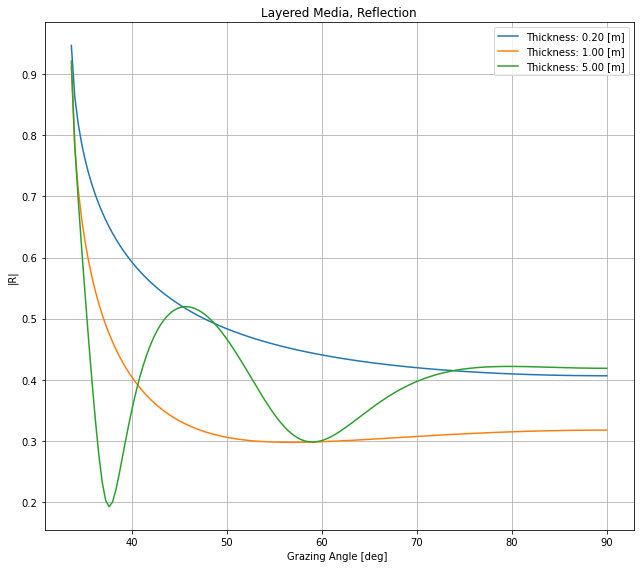

In [3]:
# Look at a few other frequencies at L = 1.5 m
f=500   # Hz
c1=1500; c2=1650; c3=1800;  # sound speeds m/s
# wavelengths will scale with sound  speed
l1=c1/f; l2=c2/f; l3=c3/f;

theta = np.linspace(0,90,250)*np.pi/180
R = np.zeros(theta.shape[0])
# compute for at least three thicknesses, h
thickness=[0.2, 1,  5, 10]       # m


fig, ax = plt.subplots(figsize=(9,8));

for i in range(3):
    h=thickness[i]
    idx=0
    for th in theta:
        # ky = |k| sin theta = 2 pi sin(theta) / lambda
        # theta = th, theta2; theta3
        th2 = np.arccos((c2/c1)*np.cos(th))
        th3 = np.arccos((c3/c1)*np.cos(th))
        ky2 = 2*np.pi*np.sin(th2)/l2
        ky3 = 2*np.pi*np.sin(th3)/l3
        # Matrix (multiplication) dimensions are A, B, R, T
        M=np.array([
            [1.,1.,-1., 0],
            [np.exp(1j*ky2*h),np.exp(-1j*ky2*h)
             , 0, -np.exp(1j*ky3*h)],
            [np.sin(th2)/z2,-np.sin(th2)/z2, np.sin(th)/z1, 0],
            [np.sin(th2)/z2*np.exp(1j*ky2*h), -np.sin(th2)/z2*np.exp(-1j*ky2*h),
             0, -np.sin(th3)/z3*np.exp(1j*ky3*h)]])
        b=np.array([1., 0, np.sin(th)/z1, 0])
        x = np.linalg.solve(M,b)

        #print("theta: {:.2f} [deg], |R|: {:.3f}".format(th*180/np.pi, np.abs(x[2])))
        R[idx] = np.abs(x[2])
        idx+=1
    ax.plot(theta*180/np.pi, R, label='Thickness: {:.2f} [m]'.format(h))

ax.grid('true'); ax.legend()
ax.set_xlabel("Grazing Angle [deg] "), ax.set_ylabel("|R|")
ax.set_title("Layered Media, Reflection")
fig.tight_layout()
plt.show()


In [46]:
theta[:5]


array([0.        , 0.00630842, 0.01261684, 0.01892526, 0.02523368])

### Problem 3 

Noise control, design a volume attenuator that will reduce sound at 120 Hz by 25 dB at normal incidence.

- How thick should the enclosure walls be?  I could not find information to solve this.  I'm sure that for the densities available, the acoustic impedance will be 500 to 2500 (or more) times that of air.  I suspect we want to ensure that boundary as fixed (so velocity goes to zero?) but don't have more information than that.
- What is my predicted TL for the enclosure at 60 Hz?
- Given notes from problem 1, I'd suspect that at normal incidence, the transmission will be maximal.

I attempt to set this problem as done in class and notes, iterate over solution space to get results.
I begin by just assuming that S2 is 2*S1 and I then calculate TL over a range of values around lambda / 2. 

Take aways so far:  
- Need a relatively large ratio of expansion chamber sizes, ~ 37:1 to get to 25dB
- Note that this implies a radius increase of about 6x vs inlet
- I use a length of 3/4 lambda or 1.51 [m]
- For frequencies of 60 Hz, 180 Hz, 240 Hz, TL are 22, 25.2, 21.8 dB
- Note at 240 Hz (this is about 3/2 lambda) I get none/very little TL
- If I use a 1/4 lambda length, 0.51 [m] I find good TL for 60 Hz at well.  (Somewhat surprising, as this should be 1/8 lambda for acoustic waves at 60Hz) 

In [257]:
c=242; rho=1.2; z1 =c*rho; f=120;
lmbda=c/f; print("Desiging noise control for lambda = {:.3f} [m]".format(lmbda))
k = 2*np.pi/lmbda
S1 = 10; S2 = 365;

Desiging noise control for lambda = 2.017 [m]


In [263]:
# putting solution into Mx = b
# x = (A, B, R, T)
# 1 + 1 -1 + 0  => 1
# e^(jk2h) + e^-(jk2h) + 0 - e^(jk3h)
# sin th2 / z2 - sin th2 / z2 + sin th1 / z1 + 0 => sin th1 /z1
# sin  th2 / z2 e^(jkh) - sin th2  / z2 e^(-jkh) + 0 - sin th3 / z3 e^(jkh) = 0


# Look at a few other frequencies at L = 1.5 m
Lspace = np.linspace(0.49,0.55,35)
for L in Lspace:
    M=np.array([
        [1.,1.,-1., 0],
        [np.exp(1j*k*L),np.exp(-1j*k*L), 0, -np.exp(-1j*k*L)],
        [S2,-S2, S1, 0],
        [S2*np.exp(1j*k*L), -S2*np.exp(-1j*k*L), 0, -S1*np.exp(1j*k*L)]
    ])
    b=np.array([1., 0, S1, 0])
    x = np.linalg.solve(M,b)
    print("L: {:.3f} [m], T: {}, TL: {:.3f}".format(L, x[3],-10*np.log10(np.real(x[3]*np.conjugate(x[3])))))

L: 0.490 [m], T: (-0.054884331147520116+0.007328353220524392j), TL: 25.134
L: 0.492 [m], T: (-0.054873178078871786+0.006403889698942894j), TL: 25.154
L: 0.494 [m], T: (-0.05486340130417382+0.005484066062458757j), TL: 25.171
L: 0.495 [m], T: (-0.05485504608217367+0.004568206837487944j), TL: 25.186
L: 0.497 [m], T: (-0.054848150499181014+0.003655643618870804j), TL: 25.198
L: 0.499 [m], T: (-0.05484274558933106+0.002745713848386825j), TL: 25.207
L: 0.501 [m], T: (-0.05483885543197958+0.0018377596200375521j), TL: 25.213
L: 0.502 [m], T: (-0.05483649722690138+0.0009311265065138582j), TL: 25.217
L: 0.504 [m], T: (-0.05483568134780682+2.5162401437479515e-05j), TL: 25.219
L: 0.506 [m], T: (-0.054836411374539394-0.0008807836279047612j), TL: 25.217
L: 0.508 [m], T: (-0.054838684104173106-0.0017873624825307007j), TL: 25.214
L: 0.509 [m], T: (-0.05484248954108385-0.002695226173588858j), TL: 25.207
L: 0.511 [m], T: (-0.054847810865928465-0.0036050289691950147j), TL: 25.198
L: 0.513 [m], T: (-0.0548

In [269]:
# Look at other frequencies, with L = 1.51 [m] 3/4 lambda;
# Also look at L = 0.51 1/4 lambda
freqs = [60,120,180,240,300, 360]
L = 0.509
print("Looking at other frequencies with L = 1.51 [m]")
for f in freqs:
    k = 2*np.pi/(c/f)
    M=np.array([[1.,1.,-1., 0],
           [np.exp(1j*k*L),np.exp(-1j*k*L), 0, -np.exp(-1j*k*L)],
           [S2,-S2, S1, 0],
           [S2*np.exp(1j*k*L), -S2*np.exp(-1j*k*L), 0, -S1*np.exp(1j*k*L)]])
    b=np.array([1., 0, S1, 0])
    x = np.linalg.solve(M,b)
    print("f: {} [Hz], T: {}, TL: {:.3f}".format(f, x[3],-10*np.log10(np.real(x[3]*np.conjugate(x[3])))))

Looking at other frequencies with L = 1.51 [m]
f: 60 [Hz], T: (-0.05471337183085759+0.05700999027858844j), TL: 22.046
f: 120 [Hz], T: (-0.054836325048785356-0.0008270867071615087j), TL: 25.218
f: 180 [Hz], T: (-0.05448775639813419-0.06073796386763266j), TL: 21.767
f: 240 [Hz], T: (0.775119676587207+0.4336704424843494j), TL: 1.030
f: 300 [Hz], T: (-0.05489107312437157+0.05350621290765393j), TL: 22.309
f: 360 [Hz], T: (-0.05484146528835534-0.0024832419757108196j), TL: 25.209


In [211]:
np.log10(.11)

-0.958607314841775